<a href="https://colab.research.google.com/github/mkaraca25/DataScience/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow**

In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [12]:
dataFrame=pd.read_excel("/content/bisiklet_fiyatlari.xlsx") 
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


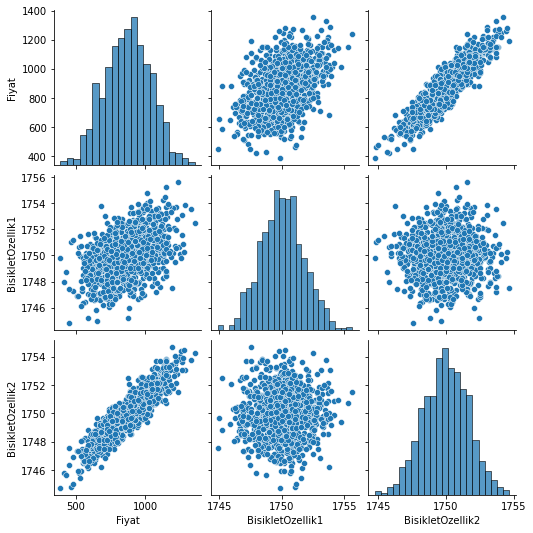

In [13]:
sbn.pairplot(dataFrame)

**Datayi test/train olarak ikiye bolme**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#train_test_split

In [16]:
#y=vx+b
#y-->label x-->feature(ozellik)
y=dataFrame["Fiyat"].values
x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)
x_train.shape

(670, 2)

In [17]:
x_test.shape

(330, 2)

In [18]:
y_test.shape

(330,)

In [19]:
y_train.shape

(670,)

In [20]:
dataFrame.shape

(1000, 3)

In [21]:
#scaling (boyut degistirme)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)


MinMaxScaler()

In [22]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model=Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [26]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795754.2500
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795475.5000
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 795148.4375
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 794761.4375
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 794304.6875
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 793751.0000
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 793088.6875
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 792313.4375
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 791415.6250
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 790389.6250
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 789236.4375
Epoch 12/250
21/21 [==============================] - 0s 3ms/st

In [27]:
loss=model.history.history["loss"]

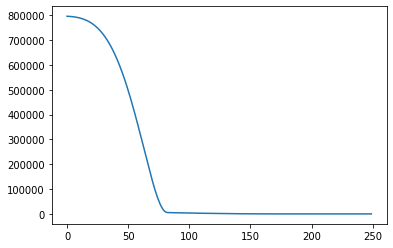

In [28]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [29]:
trainLoss=model.evaluate(x_train,y_train,verbose=0)
testLoss=model.evaluate(x_test,y_test,verbose=0)

In [30]:
trainLoss

73.30369567871094

In [31]:
testLoss

78.41576385498047

In [32]:
testTahminleri=model.predict(x_test)
testTahminleri

array([[1077.258  ],
       [ 623.29193],
       [ 875.5748 ],
       [ 893.66125],
       [ 898.9175 ],
       [ 450.9562 ],
       [ 930.59143],
       [ 990.8783 ],
       [ 940.6784 ],
       [1016.2353 ],
       [ 750.4037 ],
       [ 917.3444 ],
       [ 946.94214],
       [1054.1642 ],
       [1120.9385 ],
       [ 681.0225 ],
       [1126.414  ],
       [ 650.3713 ],
       [1154.0359 ],
       [ 886.00354],
       [ 892.2734 ],
       [ 716.2602 ],
       [ 456.35254],
       [ 611.46375],
       [ 834.47394],
       [1090.6788 ],
       [ 713.2342 ],
       [ 756.3397 ],
       [ 872.9184 ],
       [ 770.0752 ],
       [ 450.7328 ],
       [ 782.5298 ],
       [ 727.74194],
       [ 646.2612 ],
       [ 886.18256],
       [ 843.2552 ],
       [1035.1997 ],
       [1022.2497 ],
       [ 844.3943 ],
       [ 861.6712 ],
       [ 756.6066 ],
       [1174.0356 ],
       [1097.0748 ],
       [1087.2859 ],
       [ 872.6503 ],
       [ 596.0874 ],
       [1145.1918 ],
       [ 972.

In [33]:
tahminDF=pd.DataFrame(y_test,columns=["Gercek Y"])
tahminDF

,Gercek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [34]:
testTahminleri=pd.Series(testTahminleri.reshape(330,))
testTahminleri

0      1077.258057
1       623.291931
2       875.574829
3       893.661255
4       898.917480
          ...     
325    1013.025330
326     790.256348
327     765.433044
328    1167.062622
329     802.186096
Length: 330, dtype: float32

In [35]:
tahminDF=pd.concat([tahminDF,testTahminleri],axis=1)
tahminDF

,Gercek Y,0
0,1081.652164,1077.258057
1,622.675990,623.291931
2,889.356810,875.574829
3,902.826733,893.661255
4,897.662404,898.917480
...,...,...
325,1028.438035,1013.025330
326,789.934950,790.256348
327,758.490486,765.433044
328,1172.871659,1167.062622


In [36]:
tahminDF.columns=["Gercek Y","Tahmin Y"]

In [37]:
tahminDF

,Gercek Y,Tahmin Y
0,1081.652164,1077.258057
1,622.675990,623.291931
2,889.356810,875.574829
3,902.826733,893.661255
4,897.662404,898.917480
...,...,...
325,1028.438035,1013.025330
326,789.934950,790.256348
327,758.490486,765.433044
328,1172.871659,1167.062622


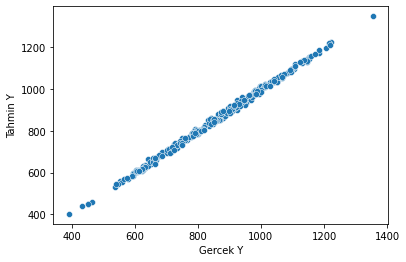

In [39]:
sbn.scatterplot(x="Gercek Y",y="Tahmin Y",data=tahminDF)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(tahminDF["Gercek Y"],tahminDF["Tahmin Y"])

7.094552967354402

In [47]:
mean_squared_error(tahminDF["Gercek Y"],tahminDF["Tahmin Y"])

78.41576414743231

In [48]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


[TensorFlow](https://www.tensorflow.org/)

[For more...](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.50092&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
